In [2]:
#Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 
import os
import itertools
import warnings
warnings.filterwarnings("ignore")
import io

################# visualization #################
import matplotlib.pyplot as plt 
from PIL import  Image
import seaborn as sns 
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

# Upload the file

In [3]:
student=pd.read_csv(r"C:\Users\BHAGYASHREE\Desktop\python\LogisticRegressionusingPython\Logistic Regression using Python\xAPI-Edu-Data.csv")
student

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L


# Check that missing value is present or not 

In [4]:
student.isnull().sum()


gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

# Checking Info

In [5]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

 Q1 Visualize just the categorical features individually to see
what options are included and how each option fares
when it comes to count(how many times it appears) and
see what can be deduce from that?

<AxesSubplot:xlabel='StudentAbsenceDays', ylabel='count'>

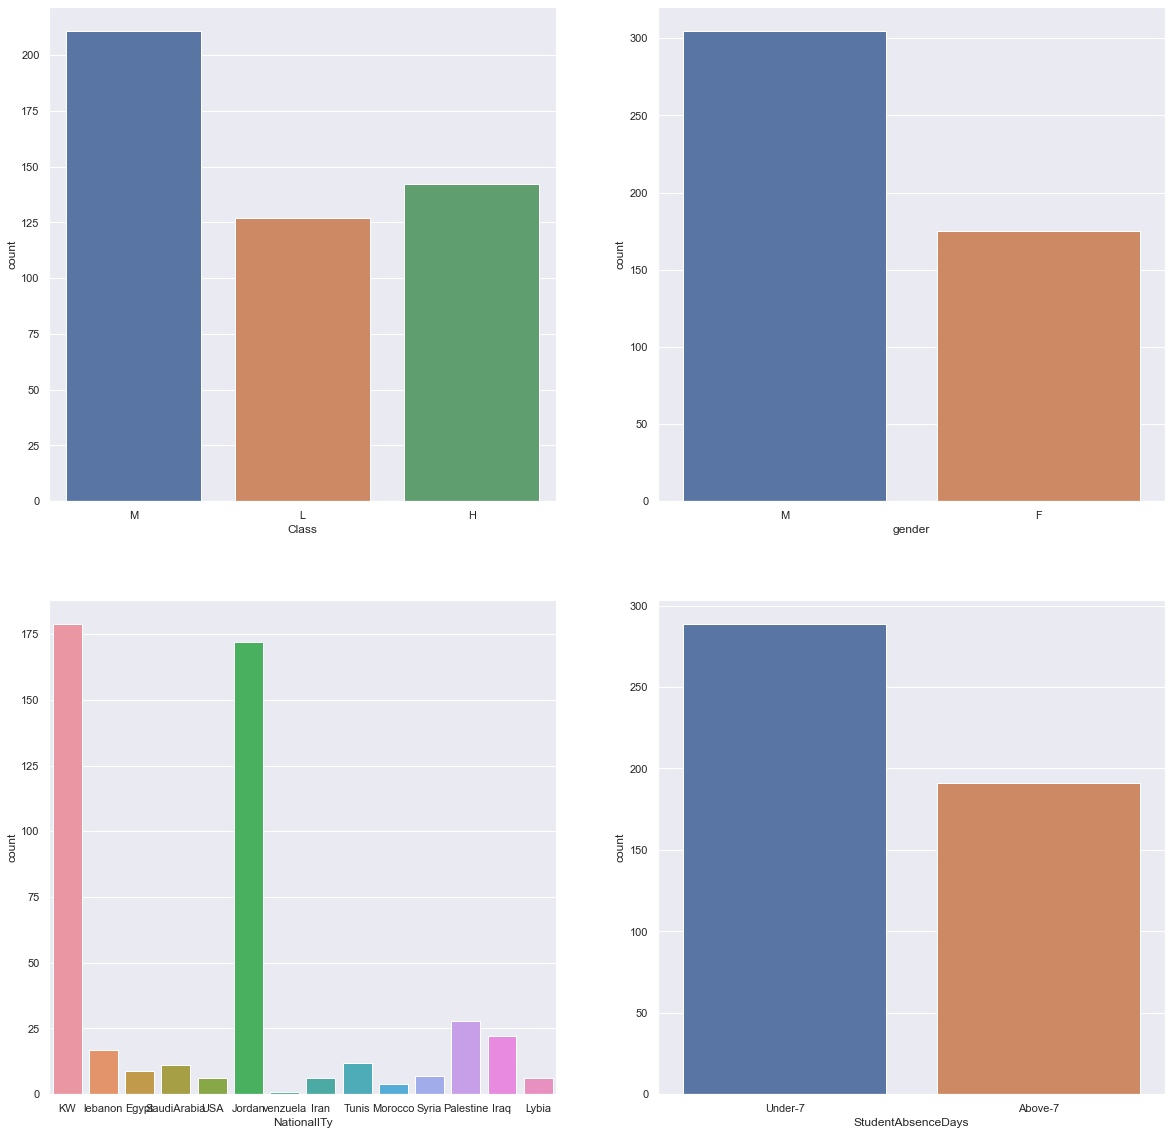

In [99]:
from matplotlib import pyplot as plt
f, axes = plt.subplots(2, 2,figsize=(20,20))
sns.countplot(x='Class', data=student, ax=axes[0,0])
sns.countplot(x='gender', data=student, ax=axes[0,1])
sns.countplot(x='NationalITy', data=student, ax=axes[1,0])
sns.countplot(x='StudentAbsenceDays', data=student, ax=axes[1,1])

In [101]:
student.Class.value_counts()

M    211
H    142
L    127
Name: Class, dtype: int64

In [103]:
211/(211+142+127)*100

43.958333333333336

In [104]:
student.gender.value_counts()

M    305
F    175
Name: gender, dtype: int64

In [113]:
175/(305+175)

0.3645833333333333

* Number of males in class is 63% as compared to female are 36%
* The presenty of students in class is more
* Students migrating from Kw and jordan are more in number 


# Plot a graph 

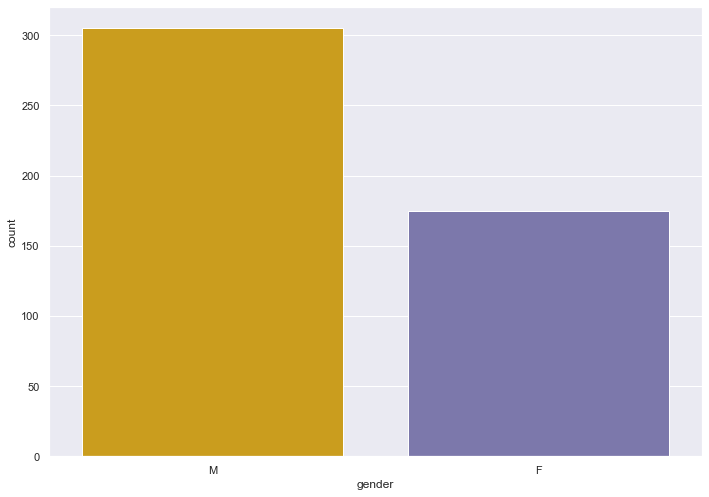

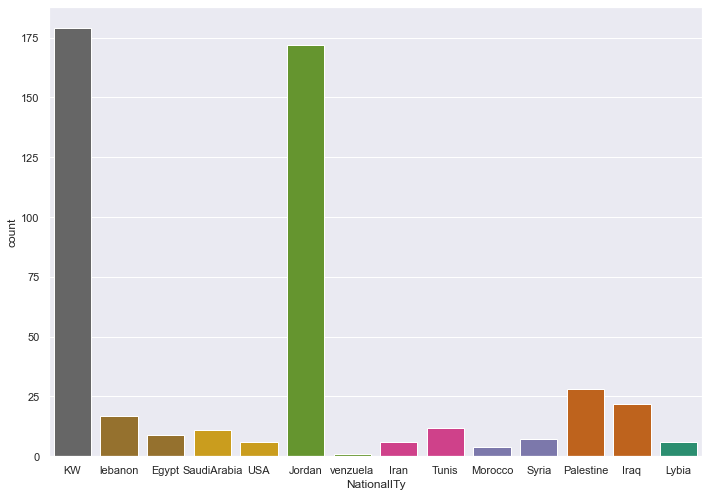

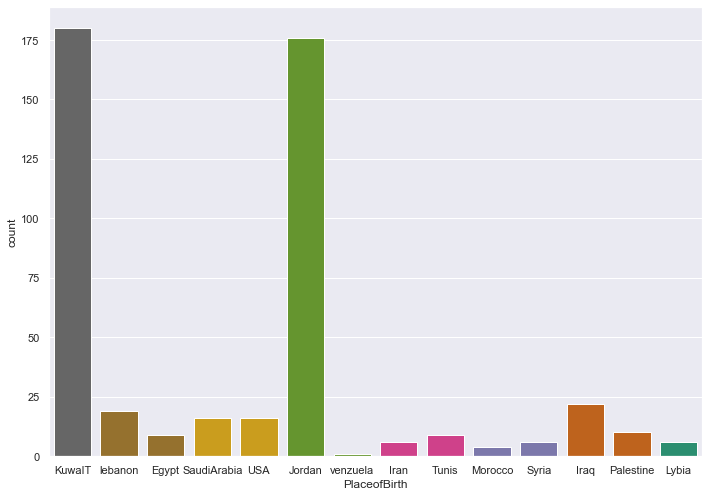

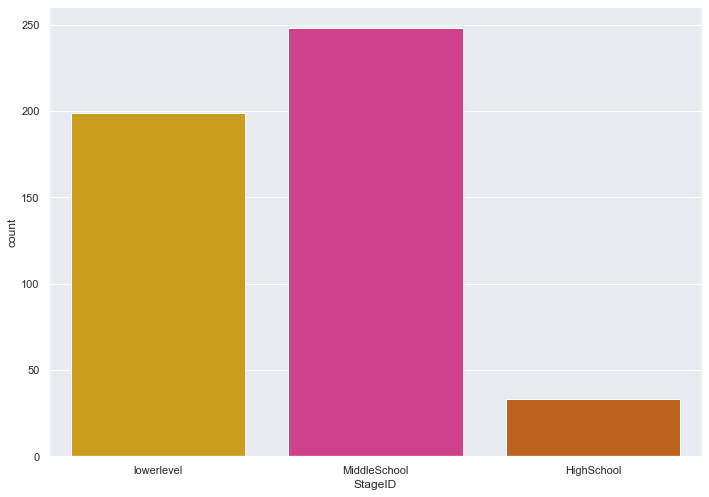

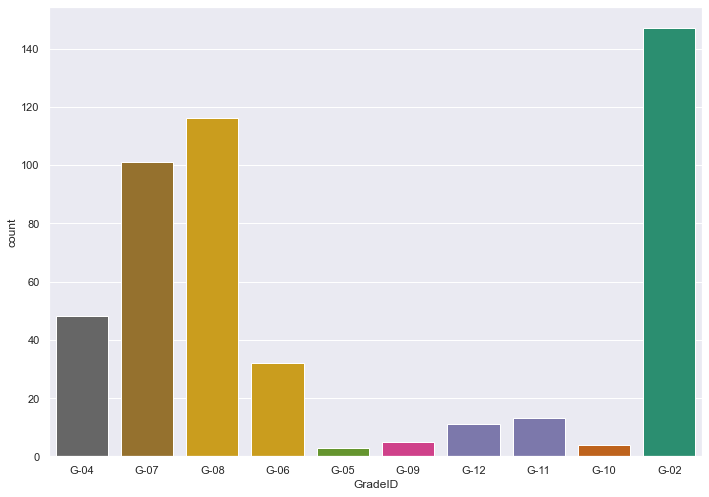

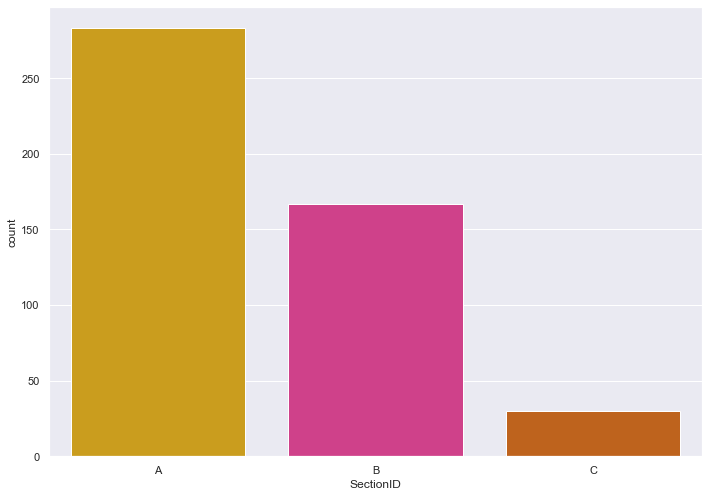

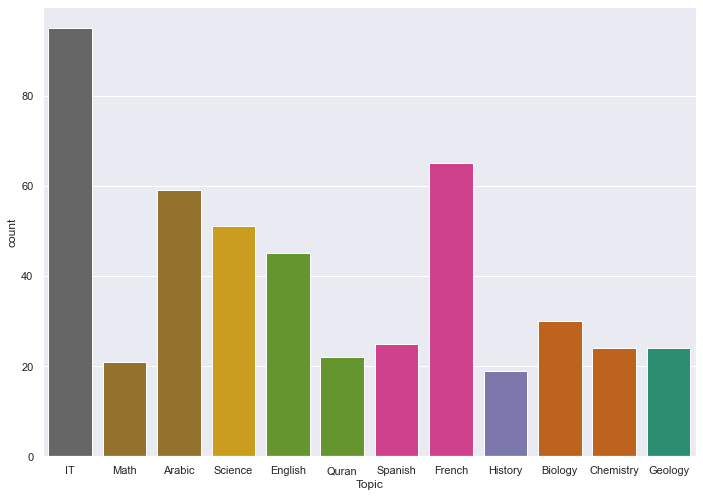

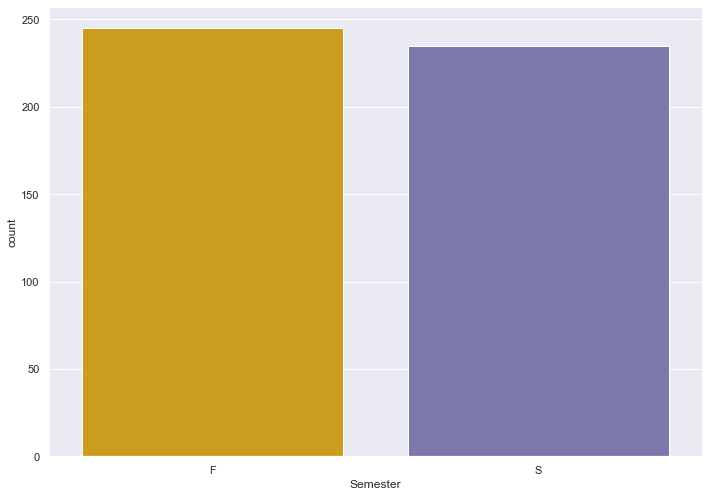

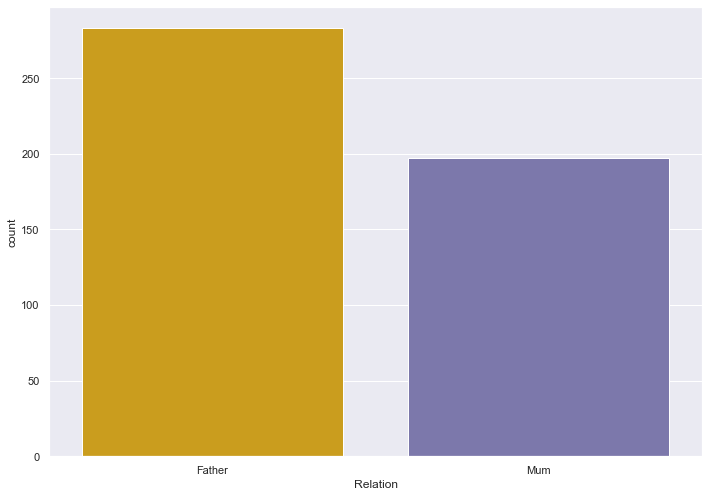

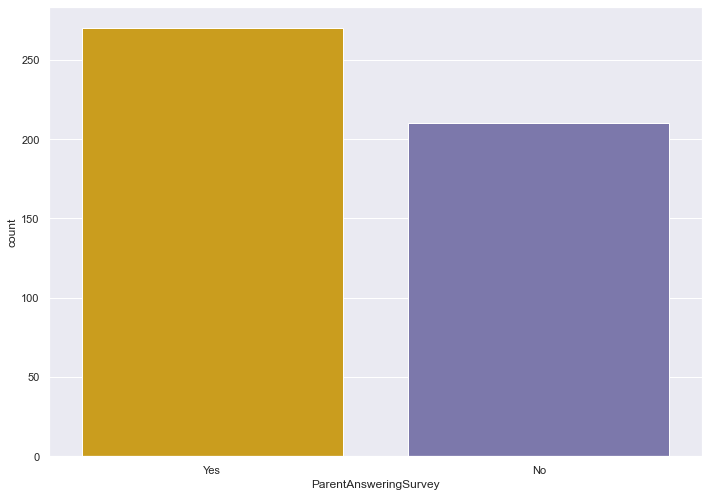

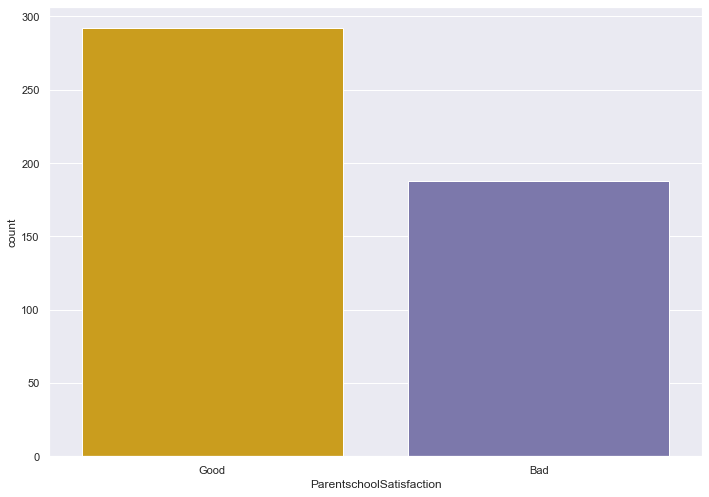

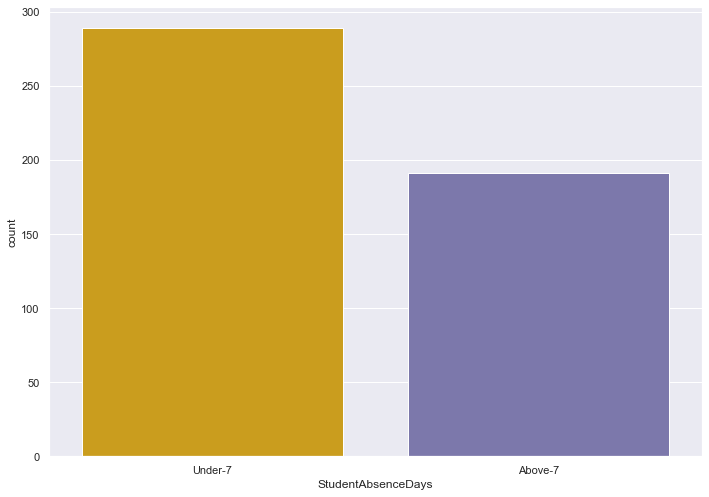

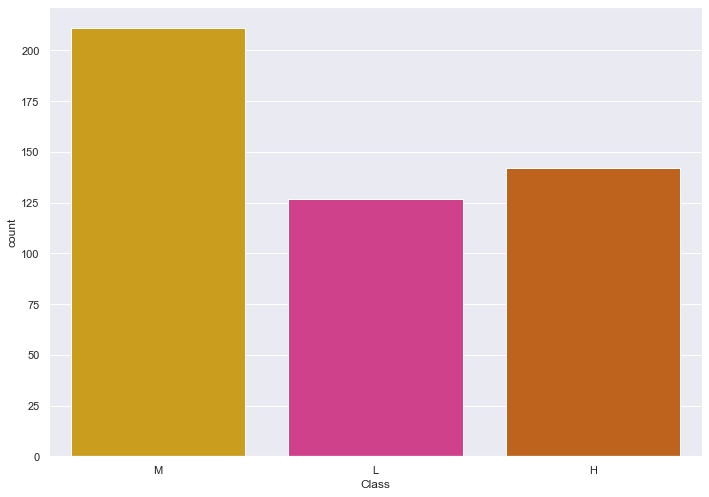

In [23]:
import matplotlib.pyplot as plt
for i in student.columns:
    if (student[i].dtype=='object'):
            plt.figure()
            sns.set(rc={'figure.figsize':(11.7,8.27)})
            sns.countplot(x=i,data=student,palette='Dark2_r')
            plt.show()
        
    

Q2 Look at some categorical features in relation to each
other, to see what insights could be possibly read?

<AxesSubplot:xlabel='gender', ylabel='count'>

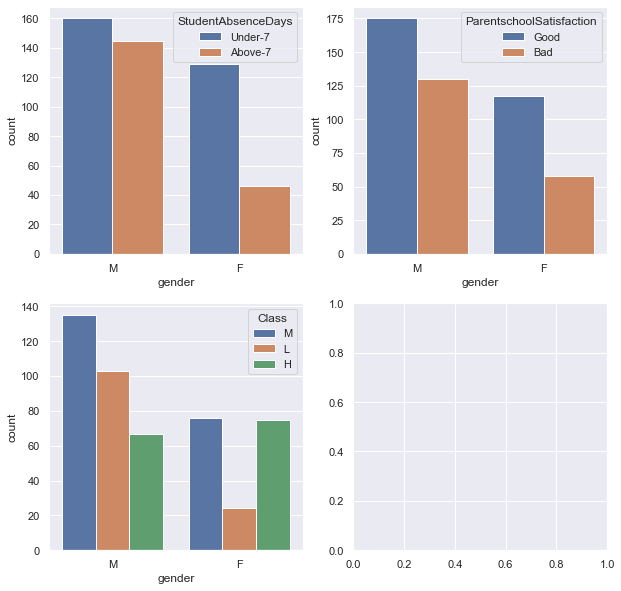

In [33]:
f, axes = plt.subplots(2, 2,figsize=(10,10))
sns.countplot(x='gender',hue="StudentAbsenceDays" ,data=student, ax=axes[0,0])
sns.countplot(x='gender',hue="ParentschoolSatisfaction", data=student, ax=axes[0,1])
sns.countplot(x='gender',hue="Class", data=student, ax=axes[1,0])

In [117]:
?pd.crosstab

In [118]:
pd.crosstab(student.gender,student.StudentAbsenceDays,normalize='columns')

StudentAbsenceDays,Above-7,Under-7
gender,,
F,0.240838,0.446367
M,0.759162,0.553633


In [120]:
pd.crosstab(student.gender,student.Class,normalize='columns')

Class,H,L,M
gender,,,
F,0.528169,0.188976,0.36019
M,0.471831,0.811024,0.63981


* More number of girls are from higher level that is 52%
* absenty for boys is also 75% as compared to girls which is 24% 

In [28]:
import plotly.express as px
fig = px.pie(student,names='Class',color='Class')
fig.show()

In [38]:
import plotly.express as px
fig = px.sunburst(student, path=["gender",'StudentAbsenceDays','Class',])
fig.show()

 Q3 Visualize categorical variables with numerical variables
and give conclusions?

<AxesSubplot:xlabel='gender', ylabel='VisITedResources'>

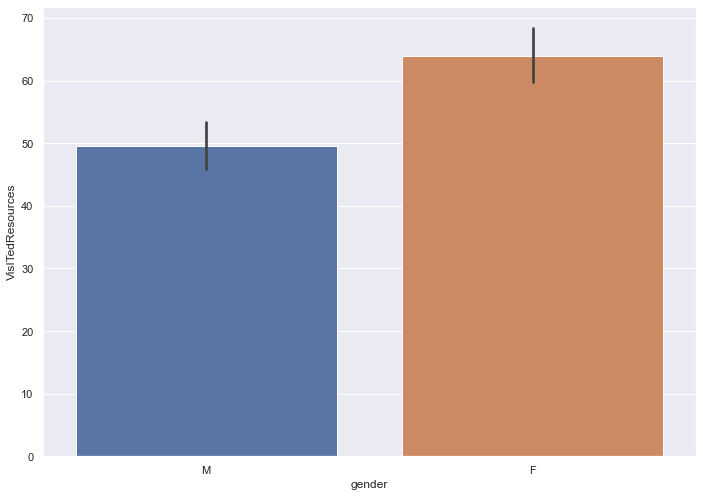

In [139]:
sns.barplot(data=student, x='gender', y='VisITedResources')


<AxesSubplot:xlabel='gender', ylabel='raisedhands'>

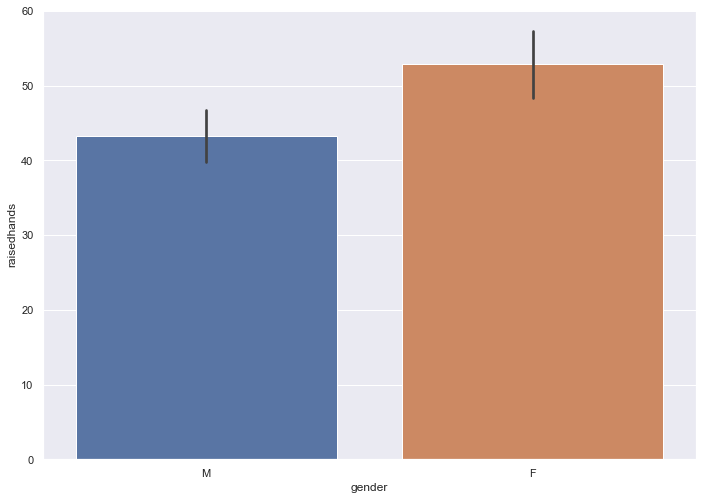

In [147]:
sns.barplot(data=student, x='gender', y='raisedhands')

Interpretation 
* From the plot Female have more raisedhands  hands in class and resources visited resources as compared to male

Q4 From the above result, what are the factors that leads to
get low grades of the students?

From above results though the Boys have Higher Attendence ie 55% as compared to girls 
but girls are clear in their concepts as they have raised more hands and visited more resources 

* girls should improve in thier attendence and boys should improve in clearing thier concepts
* boys has less doudbts cleared and less discussion hence their grade are less 

# Q5 Model building 

# Breaking Data into Two Part
* Quantitative Variable
* Qualitative Variable

In [61]:
Quantitative_Variable = student[student.select_dtypes(include=[np.number]).columns.tolist()]
Quantitative_Variable.head(3)

,raisedhands,VisITedResources,AnnouncementsView,Discussion
0,15,16,2,20
1,20,20,3,25
2,10,7,0,30


In [62]:
Qualitative_Variable = student[student.select_dtypes(include=['object']).columns.tolist()]
Qualitative_Variable.head(3)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,No,Bad,Above-7,L


# Converting qualitative Variable into number

In [63]:
from sklearn.preprocessing import LabelEncoder
Qualitative_Variable=Qualitative_Variable.apply(LabelEncoder().fit_transform) # label in ascending order
Qualitative_Variable.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,1,4,4,2,1,0,7,0,0,1,1,1,2
1,1,4,4,2,1,0,7,0,0,1,1,1,2
2,1,4,4,2,1,0,7,0,0,0,0,0,1
3,1,4,4,2,1,0,7,0,0,0,0,0,1
4,1,4,4,2,1,0,7,0,0,0,0,0,2


# Combining the dataset

In [64]:
Final_combined = pd.concat([Qualitative_Variable, Quantitative_Variable],axis=1)
Final_combined.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,raisedhands,VisITedResources,AnnouncementsView,Discussion
0,1,4,4,2,1,0,7,0,0,1,1,1,2,15,16,2,20
1,1,4,4,2,1,0,7,0,0,1,1,1,2,20,20,3,25
2,1,4,4,2,1,0,7,0,0,0,0,0,1,10,7,0,30
3,1,4,4,2,1,0,7,0,0,0,0,0,1,30,25,5,35
4,1,4,4,2,1,0,7,0,0,0,0,0,2,40,50,12,50


# Data Partition

In [66]:
from sklearn.model_selection import train_test_split

# define our input variable (X) & output variable
X = Final_combined.drop('Class', axis = 1)
Y = Final_combined[['Class']]
# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=56)

# Model Building

# Hypothesis

* H0 :- There is no log linear relationship between Class and all independent Variable

Vs 

* H1 :- There is log linear relationship between class and all independent Variable

Alpha = 0.05 (5%)

# Logistic Regression 

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
output=logreg.fit(X_train, y_train)

In [68]:
output.intercept_ 

array([-0.79069289,  0.65550135,  0.13519154])

In [69]:
output.coef_

array([[-1.00057751e+00, -5.37486603e-02,  7.77438437e-02,
        -1.43055568e+00, -4.30417826e-01, -7.95577471e-02,
        -5.16241937e-02, -1.46034077e-01,  6.13736241e-01,
         5.64892514e-01,  2.86753398e-01,  9.49469977e-01,
         2.69393870e-02,  1.87550017e-02,  1.43089420e-02,
         1.39665697e-02],
       [ 8.69673585e-01,  5.34460542e-02, -4.31428999e-02,
         1.28665964e+00,  3.78394692e-01,  1.90563035e-01,
        -2.62235178e-02,  4.39258620e-01,  2.80165368e-02,
        -4.65071302e-01, -1.50198638e-01, -1.11633016e+00,
        -2.96010193e-02, -2.64515531e-02, -3.32301445e-02,
        -9.79546606e-03],
       [ 1.30903921e-01,  3.02606118e-04, -3.46009438e-02,
         1.43896042e-01,  5.20231345e-02, -1.11005287e-01,
         7.78477116e-02, -2.93224543e-01, -6.41752778e-01,
        -9.98212113e-02, -1.36554760e-01,  1.66860179e-01,
         2.66163228e-03,  7.69655142e-03,  1.89212026e-02,
        -4.17110361e-03]])

In [70]:
output.n_features_in_

16

# Interpretation 
* we do not reject h0 



# Predictions on Train Dataset

In [71]:
train=pd.concat([X_train,y_train],axis=1)
train.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,raisedhands,VisITedResources,AnnouncementsView,Discussion,Class
268,1,3,3,1,3,0,3,0,0,1,0,0,10,8,10,10,2
446,1,3,3,1,5,0,5,0,1,1,1,1,77,82,74,79,2
44,0,4,4,0,6,0,7,0,0,0,0,1,33,33,30,90,2
164,1,3,3,2,0,1,4,1,1,1,1,0,55,72,83,14,2
377,1,3,3,2,0,1,0,1,1,1,0,0,32,82,59,63,2


In [72]:
train['Predicted']=output.predict(X_train)
train.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,raisedhands,VisITedResources,AnnouncementsView,Discussion,Class,Predicted
268,1,3,3,1,3,0,3,0,0,1,0,0,10,8,10,10,2,1
446,1,3,3,1,5,0,5,0,1,1,1,1,77,82,74,79,2,0
44,0,4,4,0,6,0,7,0,0,0,0,1,33,33,30,90,2,2
164,1,3,3,2,0,1,4,1,1,1,1,0,55,72,83,14,2,2
377,1,3,3,2,0,1,0,1,1,1,0,0,32,82,59,63,2,2


# Model Performance Metrics

In [74]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(train['Predicted'], train['Class'])
matrix

array([[ 78,   0,  28],
       [  1,  85,  15],
       [ 35,  12, 130]], dtype=int64)

In [76]:
Accuracy_Train=((78+85+130)/(78+28+1+85+15+35+12+130)*100)
print(Accuracy_Train)

76.30208333333334


# accuracy is 79%

In [75]:
from sklearn.metrics import classification_report
print(classification_report(train['Class'],train['Predicted']))

              precision    recall  f1-score   support

           0       0.74      0.68      0.71       114
           1       0.84      0.88      0.86        97
           2       0.73      0.75      0.74       173

    accuracy                           0.76       384
   macro avg       0.77      0.77      0.77       384
weighted avg       0.76      0.76      0.76       384



Acuuracy of model is 76% hence model is good fit  

# Predictions on Test Dataset

In [77]:
test=pd.concat([X_test,y_test],axis=1)
test.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,raisedhands,VisITedResources,AnnouncementsView,Discussion,Class
103,1,4,4,2,0,1,7,0,0,0,0,0,1,7,6,10,1
134,1,4,4,1,4,0,9,1,0,1,1,1,80,80,15,70,0
435,1,3,3,1,5,0,2,1,1,1,1,0,79,88,79,20,2
91,1,4,4,2,0,1,7,0,0,1,1,1,80,90,55,19,0
246,0,4,4,1,3,0,10,1,0,1,1,1,80,94,62,77,0


In [78]:
test['Predicted']=output.predict(X_test)
test.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,raisedhands,VisITedResources,AnnouncementsView,Discussion,Class,Predicted
103,1,4,4,2,0,1,7,0,0,0,0,0,1,7,6,10,1,1
134,1,4,4,1,4,0,9,1,0,1,1,1,80,80,15,70,0,2
435,1,3,3,1,5,0,2,1,1,1,1,0,79,88,79,20,2,2
91,1,4,4,2,0,1,7,0,0,1,1,1,80,90,55,19,0,2
246,0,4,4,1,3,0,10,1,0,1,1,1,80,94,62,77,0,0


# Model Performance Metrics on Test data

In [79]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(test['Predicted'],test['Class'])
print(matrix)

[[21  0  6]
 [ 1 26  6]
 [ 6  4 26]]


In [80]:
Accuracy_test=((21+26+26)/(21+6+1+26+6+6+4+26)*100)
Accuracy_test

76.04166666666666

In [81]:
from sklearn.metrics import classification_report
print(classification_report(test['Class'],test['Predicted']))

              precision    recall  f1-score   support

           0       0.78      0.75      0.76        28
           1       0.79      0.87      0.83        30
           2       0.72      0.68      0.70        38

    accuracy                           0.76        96
   macro avg       0.76      0.77      0.76        96
weighted avg       0.76      0.76      0.76        96



Acuuracy of Test model is 76% hence model is good fit 